In [1]:
import pandas as pd
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv("/content/label (2).csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Subject ',
       'Q1.Did you face any internet connectivity issues during the class?',
       'Q2. How many times on average did the meeting disconnect?',
       'Q3.Were you able to understand the concept?',
       'Q4.which platform was used for the class?',
       'Q5.Attendance in the subject?',
       'Q6.The interactive tools used for teaching in classes?',
       'Q7.How many questions did the teacher ask in the class?',
       'Q8.How many questions did you ask the teacher?',
       'Q9.Which study material provided by the university did you use for studying?',
       'Q10.Examination Portal was well managed for this subject? ',
       'Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?',
       'Q12. Was the professor available for the doubts?',
       'Q13.lecture recording was provided?', 'Q14.Interest in the subject? ',
       'Q15.For how much time on average did you attentively a

In [4]:
for i in range(len(df["Q7.How many questions did the teacher ask in the class?"])):
    if df["Q7.How many questions did the teacher ask in the class?"][i]==0:
        df["Q7.How many questions did the teacher ask in the class?"][i]="none"
    elif 0<df["Q7.How many questions did the teacher ask in the class?"][i]<=2:
        df["Q7.How many questions did the teacher ask in the class?"][i]="more than 1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [5]:
df['Q7.How many questions did the teacher ask in the class?'].value_counts()

more than 1    215
none           199
Name: Q7.How many questions did the teacher ask in the class?, dtype: int64

In [6]:
df["Q2. How many times on average did the meeting disconnect?"].value_counts()

0     124
1      86
2      77
3      51
4      24
10     17
7      13
5       9
6       7
9       3
8       3
Name: Q2. How many times on average did the meeting disconnect?, dtype: int64

In [7]:
for i in range(len(df["Q2. How many times on average did the meeting disconnect?"])):
    if df["Q2. How many times on average did the meeting disconnect?"][i]==0:
        df["Q2. How many times on average did the meeting disconnect?"][i]="none"
    elif 0<df["Q2. How many times on average did the meeting disconnect?"][i]<=4:
        df["Q2. How many times on average did the meeting disconnect?"][i]="normal"
    elif 4<df["Q2. How many times on average did the meeting disconnect?"][i]<=10:
        df["Q2. How many times on average did the meeting disconnect?"][i]="extreme"
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [8]:
df.head(100)

,Unnamed: 0,Timestamp,Subject,Q1.Did you face any internet connectivity issues during the class?,Q2. How many times on average did the meeting disconnect?,Q3.Were you able to understand the concept?,Q4.which platform was used for the class?,Q5.Attendance in the subject?,Q6.The interactive tools used for teaching in classes?,Q7.How many questions did the teacher ask in the class?,Q8.How many questions did you ask the teacher?,Q9.Which study material provided by the university did you use for studying?,Q10.Examination Portal was well managed for this subject?,Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?,Q12. Was the professor available for the doubts?,Q13.lecture recording was provided?,Q14.Interest in the subject?,Q15.For how much time on average did you attentively attend the classes?,Q16.Did you get the choice of your Teacher in the subject?,Q17.How many questions in the exam you could have answered on your own?,Q18.Your grade in the subject,Q19.Give Some Suggestion you have for the online learning (only fill once).
0,6,1-21-2021 20:40:52,software engineering,1,none,0,['Google Meet'],1,['Presentation'],none,0,"['Physical Books', ' Presentations']","['The Navigation was bad ', ' and portal was l...",1,0,1,1,3,0,0,9,They should make there own Portal with more po...
1,7,1-21-2021 20:45:19,computer networks,1,none,0,"['Zoom', ' Google Meet']",0,"['Presentation', ' Virtual Board']",none,0,"['E-Books', ' Notes', ' Presentations']",['Facing Problem while uploading'],1,0,1,2,0,2,3,9,1.The teacher always ask for ON your video for...
2,8,1-21-2021 20:48:42,computer networks,1,none,0,['Google Meet'],0,['White board'],none,0,['E-Books'],['Facing Problem while uploading'],1,2,1,3,0,0,3,9,The DATABASE error has to be fixed as it cause...
3,9,1-21-2021 20:51:20,design and analysis of algorithms,0,normal,0,['Zoom'],2,['White board'],more than 1,0,"['Notes', ' Presentations', ' Youtube Videos']",['Server errors were frequent'],1,2,1,0,0,2,2,9,Students should be asked to turn on their videos.
4,10,1-21-2021 20:51:58,design and analysis of algorithms,1,none,0,['Google Meet'],1,['Presentation'],more than 1,2,['Physical Books'],['Everything was perfect'],1,3,3,3,2,2,1,10,the files uploading interface was not good and...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,101,1-22-2021 14:00:55,Data Mining and Data Warehousing,0,extreme,0,"['Zoom', ' Google Meet']",1,"['Presentation', ' Links to reference Material']",none,0,"['Notes', ' Presentations']",['Everything was perfect'],1,2,1,0,1,2,4,9,NaN
96,102,1-22-2021 14:01:20,compiler design,0,normal,0,['Zoom'],1,['Virtual Board'],none,0,"['Notes', ' Presentations']",['Facing Problem while uploading'],0,0,2,1,0,1,4,9,NaN
97,103,1-22-2021 14:02:03,Computational Intelligence,1,none,1,"['Zoom', ' Google Meet']",0,"['White board', ' Presentation', ' Links to re...",more than 1,0,['Presentations'],['Everything was perfect'],1,0,1,1,1,0,3,8,NaN
98,104,1-22-2021 14:03:39,Computational Intelligence,1,normal,1,['Google Meet'],3,"['Presentation', ' Virtual Board', ' Links to ...",more than 1,0,['Presentations'],['Everything was perfect'],1,1,1,1,0,0,3,8,NaN


In [9]:
df["Q10.Examination Portal was well managed for this subject? "]

0      ['The Navigation was bad ', ' and portal was l...
1                     ['Facing Problem while uploading']
2                     ['Facing Problem while uploading']
3                        ['Server errors were frequent']
4                             ['Everything was perfect']
                             ...                        
409                   ['Facing Problem while uploading']
410                   ['Facing Problem while uploading']
411    ['Facing Problem while uploading', ' Diagrams ...
412                           ['Everything was perfect']
413                           ['Everything was perfect']
Name: Q10.Examination Portal was well managed for this subject? , Length: 414, dtype: object

In [10]:
#"everthing is fine"=1
#else whatever it is ==0
for i in range(len(df["Q10.Examination Portal was well managed for this subject? "])):
    if df["Q10.Examination Portal was well managed for this subject? "][i]=="['Everything was perfect']":
        df["Q10.Examination Portal was well managed for this subject? "][i]=1
    elif df["Q10.Examination Portal was well managed for this subject? "][i]!="['Everything was perfect']":
        df["Q10.Examination Portal was well managed for this subject? "][i]=0
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Subject ',
       'Q1.Did you face any internet connectivity issues during the class?',
       'Q2. How many times on average did the meeting disconnect?',
       'Q3.Were you able to understand the concept?',
       'Q4.which platform was used for the class?',
       'Q5.Attendance in the subject?',
       'Q6.The interactive tools used for teaching in classes?',
       'Q7.How many questions did the teacher ask in the class?',
       'Q8.How many questions did you ask the teacher?',
       'Q9.Which study material provided by the university did you use for studying?',
       'Q10.Examination Portal was well managed for this subject? ',
       'Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?',
       'Q12. Was the professor available for the doubts?',
       'Q13.lecture recording was provided?', 'Q14.Interest in the subject? ',
       'Q15.For how much time on average did you attentively a

In [12]:
df["Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?"].value_counts()

0    218
1    196
Name: Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?, dtype: int64

In [13]:
df["Q12. Was the professor available for the doubts?"].value_counts()

3    162
0    117
2     99
1     36
Name: Q12. Was the professor available for the doubts?, dtype: int64

In [14]:
df['Q13.lecture recording was provided?'].value_counts()

1    247
3    102
2     38
0     27
Name: Q13.lecture recording was provided?, dtype: int64

In [15]:
df["Q18.Your grade in the subject "].value_counts()

9     212
10    110
8      71
7      10
5       7
6       4
Name: Q18.Your grade in the subject , dtype: int64

In [16]:
for i in range(414):
    if df["Q18.Your grade in the subject "][i]==5:
        df["Q18.Your grade in the subject "][i]="below average"
    elif 6<=df["Q18.Your grade in the subject "][i]<=7:
        df["Q18.Your grade in the subject "][i]="average"
    elif 8<=df["Q18.Your grade in the subject "][i]<=10:
        df["Q18.Your grade in the subject "][i]="great"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykerne

In [17]:
df["Q18.Your grade in the subject "].value_counts()

great            393
average           14
below average      7
Name: Q18.Your grade in the subject , dtype: int64

In [18]:
for i in range(414):
    if 0<=df["Q5.Attendance in the subject?"][i]<=2:
        df["Q5.Attendance in the subject?"][i]="above 75"
    elif df["Q5.Attendance in the subject?"][i]==3:
        df["Q5.Attendance in the subject?"][i]="below 75"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [19]:
df["Q5.Attendance in the subject?"].value_counts()

above 75    369
below 75     45
Name: Q5.Attendance in the subject?, dtype: int64

In [20]:
df['Q15.For how much time on average did you attentively attend the classes?'].value_counts()

1    126
2    122
3     86
0     80
Name: Q15.For how much time on average did you attentively attend the classes?, dtype: int64

In [21]:
for i in range(414):
    if df['Q17.How many questions in the exam you could have answered on your own?'][i]==4 or df['Q17.How many questions in the exam you could have answered on your own?'][i]==1:
        df['Q17.How many questions in the exam you could have answered on your own?'][i]="above 75%"
    else:
        df['Q17.How many questions in the exam you could have answered on your own?'][i]="below 75%"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

In [22]:
df['Q17.How many questions in the exam you could have answered on your own?'].value_counts()

above 75%    240
below 75%    174
Name: Q17.How many questions in the exam you could have answered on your own?, dtype: int64

In [23]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q4.which platform was used for the class?"]))
df["Q4.which platform was used for the class?"]=le.transform(df["Q4.which platform was used for the class?"])

In [24]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q5.Attendance in the subject?"]))
df["Q5.Attendance in the subject?"]=le.transform(df["Q5.Attendance in the subject?"])

In [25]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q6.The interactive tools used for teaching in classes?"]))
df["Q6.The interactive tools used for teaching in classes?"]=le.transform(df["Q6.The interactive tools used for teaching in classes?"])

In [26]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q7.How many questions did the teacher ask in the class?"]))
df["Q7.How many questions did the teacher ask in the class?"]=le.transform(df["Q7.How many questions did the teacher ask in the class?"])

In [27]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q9.Which study material provided by the university did you use for studying?"]))
df["Q9.Which study material provided by the university did you use for studying?"]=le.transform(df["Q9.Which study material provided by the university did you use for studying?"])

In [28]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q2. How many times on average did the meeting disconnect?"]))
df["Q2. How many times on average did the meeting disconnect?"]=le.transform(df["Q2. How many times on average did the meeting disconnect?"])

In [29]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df['Q15.For how much time on average did you attentively attend the classes?']))
df['Q15.For how much time on average did you attentively attend the classes?']=le.transform(df['Q15.For how much time on average did you attentively attend the classes?'])

In [30]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q17.How many questions in the exam you could have answered on your own?"]))
df["Q17.How many questions in the exam you could have answered on your own?"]=le.transform(df["Q17.How many questions in the exam you could have answered on your own?"])

In [31]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
le.fit(list(df["Q18.Your grade in the subject "]))
df["Q18.Your grade in the subject "]=le.transform(df["Q18.Your grade in the subject "]) 

In [32]:
df["Q18.Your grade in the subject "].value_counts()

2    393
0     14
1      7
Name: Q18.Your grade in the subject , dtype: int64

In [33]:
df["Q2. How many times on average did the meeting disconnect?"].value_counts()

2    238
1    124
0     52
Name: Q2. How many times on average did the meeting disconnect?, dtype: int64

In [34]:
#X=df[['Q1.Did you face any internet connectivity issues during the class?','Q4.which platform was used for the class?','Q6.The interactive tools used for teaching in classes?','Q8.How many questions did you ask the teacher?','Q10.Examination Portal was well managed for this subject? ','Q12. Was the professor available for the doubts?','Q13.lecture recording was provided?', 'Q14.Interest in the subject? ','Q15.For how much time on average did you attentively attend the classes?','Q16.Did you get the choice of your Teacher in the subject?']].values
X = df[df.columns[3:20]].values


In [35]:
df.columns[3:20]

Index(['Q1.Did you face any internet connectivity issues during the class?',
       'Q2. How many times on average did the meeting disconnect?',
       'Q3.Were you able to understand the concept?',
       'Q4.which platform was used for the class?',
       'Q5.Attendance in the subject?',
       'Q6.The interactive tools used for teaching in classes?',
       'Q7.How many questions did the teacher ask in the class?',
       'Q8.How many questions did you ask the teacher?',
       'Q9.Which study material provided by the university did you use for studying?',
       'Q10.Examination Portal was well managed for this subject? ',
       'Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?',
       'Q12. Was the professor available for the doubts?',
       'Q13.lecture recording was provided?', 'Q14.Interest in the subject? ',
       'Q15.For how much time on average did you attentively attend the classes?',
       'Q16.Did you get t

In [36]:
y = df['Q18.Your grade in the subject '].values

y[0:5]

array([2, 2, 2, 2, 2])

# SMOTE

In [37]:
pip install imblearn

In [38]:
import imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.56082500e+00, -2.33584222e-03, -1.19778555e+00,
        -2.53015866e-01, -9.21409537e-01, -3.92444118e-01,
         7.72568693e-01, -3.11707453e-01,  1.36494963e+00,
        -9.43108646e-01,  8.77823526e-01, -8.16760396e-01,
        -5.42864748e-01, -3.73648142e-01,  1.10092613e+00,
        -1.00027898e+00,  7.24425194e-01],
       [ 1.56082500e+00, -2.33584222e-03, -1.19778555e+00,
         1.62888295e+00, -9.21409537e-01, -1.04573231e+00,
         7.72568693e-01, -3.11707453e-01, -1.11466903e+00,
        -9.43108646e-01,  8.77823526e-01, -8.16760396e-01,
        -5.42864748e-01,  8.98281917e-01, -1.86484374e+00,
         1.42368491e+00,  7.24425194e-01],
       [ 1.56082500e+00, -2.33584222e-03, -1.19778555e+00,
        -2.53015866e-01, -9.21409537e-01,  2.65623411e+00,
         7.72568693e-01, -3.11707453e-01, -7.60437795e-01,
        -9.43108646e-01,  8.77823526e-01,  9.86989327e-01,
        -5.42864748e-01,  2.17021198e+00, -1.86484374e+00,
        -1.00027898e+00,  7.2

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (943, 17) (943,)
Test set: (236, 17) (236,)


# KNN WITH HYPERPARAMTER TUNING

In [43]:
from sklearn.metrics import f1_score
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(yhat)
print(y_test)
print(f1_score(yhat,y_test,average="macro"))

[0.92372881 0.89830508 0.90677966 0.88983051 0.8940678  0.88135593
 0.88559322 0.87288136 0.88135593]
[1 1 2 0 1 2 0 1 0 0 2 2 0 1 2 2 0 2 1 0 0 2 0 2 0 0 1 1 0 2 2 2 2 1 0 0 0
 2 0 0 1 2 0 1 1 2 2 1 1 0 0 2 0 0 0 0 0 0 0 0 1 0 0 1 2 1 1 0 0 2 0 0 1 1
 0 1 2 0 0 1 2 0 0 1 1 2 2 0 0 1 2 1 1 1 1 0 2 0 0 1 1 0 0 2 0 0 0 2 1 2 1
 1 1 0 0 0 0 2 0 0 1 2 1 1 2 0 0 0 1 0 1 1 0 0 0 1 1 2 1 0 1 1 1 2 2 0 2 0
 0 0 0 2 1 0 0 1 2 0 1 0 1 0 1 1 0 2 1 1 1 0 1 0 2 2 2 1 1 2 0 0 2 1 1 2 0
 1 0 0 1 1 0 1 2 2 0 0 2 2 0 0 0 1 0 2 0 0 2 1 2 1 2 2 1 1 0 1 1 0 0 1 1 0
 1 2 0 0 0 1 0 0 0 2 0 1 1 0]
[1 1 2 0 1 2 0 1 2 0 2 2 0 1 2 2 2 2 1 2 0 2 2 2 0 2 1 1 0 2 2 2 2 1 2 0 0
 2 2 2 1 2 0 1 1 2 2 1 1 0 0 2 0 0 0 0 0 0 0 0 1 2 0 1 2 1 1 0 2 2 2 0 1 1
 2 1 2 0 0 1 2 0 0 1 1 2 2 0 0 1 2 1 1 0 1 0 2 0 0 1 1 2 0 2 0 0 0 2 1 2 1
 1 1 2 0 0 2 2 0 0 1 2 1 1 2 0 0 2 1 0 1 1 2 2 0 1 1 2 1 2 1 1 1 2 2 2 2 0
 0 0 0 2 1 0 0 1 2 0 1 0 1 0 1 1 2 2 1 1 1 0 1 2 2 2 2 1 1 2 2 0 2 1 1 2 0
 1 0 0 1 1 0 1 2 2 0 0 2 2 0 0 0 1 0 2 0 0 

[0.94147582697201, 0.9202714164546225, 0.9219677692960135, 0.90754877014419, 0.910941475826972, 0.8965224766751485, 0.9016115351993216, 0.8897370653095843, 0.8922815945716709, 0.8821034775233249, 0.8846480067854112, 0.8761662425784563, 0.8804071246819339, 0.8702290076335878, 0.8727735368956743, 0.8608990670059372, 0.8651399491094147, 0.8583545377438508, 0.8575063613231553, 0.8532654792196779, 0.8549618320610687, 0.8464800678541136, 0.8490245971162003, 0.8422391857506363, 0.8447837150127226, 0.842239185750636, 0.8405428329092453, 0.833757421543681, 0.83206106870229, 0.8278201865988125]


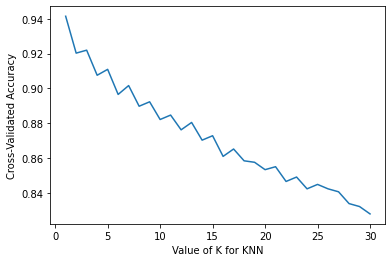

In [44]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=9, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
print(f1_score(yhat,y_test,average="macro"))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}
Accuracy: 0.902542372881356
Confusion Metrix:
 [[76  1 20]
 [ 1 75  1]
 [ 0  0 62]]
0.8806434646232081


# GRADIENTBOOSTINGCLASSIFIER

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
print(clf.score(X_train,y_train))#trianing dataset
print(clf.score(X_test, y_test))# test accuracy 
print(f1_score(yhat,y_test,average="macro"))

0.9968186638388123
0.9661016949152542
0.8806434646232081


In [49]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [50]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=3)
cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [51]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [52]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


0.832 + or -0.02 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.91 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.946 + or -0.008 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.969 + or -0.008 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.934 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.964 + or -0.008 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.986 + or -0.01 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.985 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.957 + or -0.01 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.973 + or -0.005 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.983 + or -0.011 for the {'learning_rate': 0.01, 'max_dept

In [53]:
cv.score(X_test,y_test)

0.961864406779661

In [54]:
#0.822 + or -0.041 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

In [55]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01,max_depth=3, random_state=0).fit(X_train, y_train)
print(clf.score(X_train,y_train))#trianing dataset
print(clf.score(X_test, y_test))# test accuracy 
print(f1_score(yhat,y_test,average="macro"))

0.9936373276776246
0.961864406779661
0.8806434646232081


# ADABOOSTCLASSIFIER

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
a=clf.predict(X_test)

In [58]:
from sklearn.metrics import f1_score
print(clf.score(X_test,y_test))
print(f1_score(a,y_test,average="macro"))

0.6440677966101694
0.6509498443777165


# DECISIONTREECLASSIFIER

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
grade = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
grade.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
predTree = grade.predict(X_test)

In [62]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print(f1_score(yhat,y_test,average="macro"))

DecisionTrees's Accuracy:  0.9110169491525424
0.8806434646232081


# SVM CLASSIFIER

In [63]:
from sklearn import svm

In [64]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
yhat = clf.predict(X_test)

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
print(f1_score(yhat,y_test,average="macro"))
print(clf.score(X_test,y_test))

0.9789384059369012
0.9788135593220338


# GAUSSIAN NB

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
cl=GaussianNB()
cl.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
a=cl.predict(X_test)

In [70]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, a))
print(f1_score(yhat,y_test,average="macro"))

DecisionTrees's Accuracy:  0.9279661016949152
0.9789384059369012


# LOGISTICREGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf=LogisticRegression(random_state=11).fit(X_train,y_train)

In [73]:
a=clf.predict(X_test)

In [74]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, a))
print(f1_score(yhat,y_test,average="macro"))

DecisionTrees's Accuracy:  0.9152542372881356
0.9789384059369012


In [75]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.914853 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.913427 (0.033715) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912367 (0.033812) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.914853 (0.033919) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.911303 (0.032856) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911657 (0.032720) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.913792 (0.033606) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.911303 (0.033305) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911303 (0.033305) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910963 (0.032242) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.906711 (0.033285) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.906711 (0.033285) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.897529 (0.035640) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.890123 (0.035785) wit

# SGDCLASSIFIER

In [76]:
from sklearn.linear_model import SGDClassifier

In [77]:
sgd=SGDClassifier(loss='modified_huber',shuffle=False, random_state=11)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)

In [78]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print(f1_score(yhat,y_test,average="macro"))

DecisionTrees's Accuracy:  0.8813559322033898
0.9789384059369012


# ANN

In [79]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [80]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 17, activation = 'sigmoid', input_shape = (17,)))

model.add(tf.keras.layers.Dense(units = 34, activation = 'sigmoid'))

model.add(tf.keras.layers.Dense(units = 17, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [81]:
model.fit(X_train, y_train, epochs = 100, batch_size = 18)

Epoch 1/100
53/53 [==============================] - 1s 1ms/step - loss: 2.6075 - sparse_categorical_accuracy: 0.1972
Epoch 2/100
53/53 [==============================] - 0s 1ms/step - loss: 1.5433 - sparse_categorical_accuracy: 0.4115
Epoch 3/100
53/53 [==============================] - 0s 1ms/step - loss: 1.1008 - sparse_categorical_accuracy: 0.6225
Epoch 4/100
53/53 [==============================] - 0s 1ms/step - loss: 0.8925 - sparse_categorical_accuracy: 0.7487
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 0.7577 - sparse_categorical_accuracy: 0.8112
Epoch 6/100
53/53 [==============================] - 0s 1ms/step - loss: 0.6656 - sparse_categorical_accuracy: 0.7943
Epoch 7/100
53/53 [==============================] - 0s 1ms/step - loss: 0.5985 - sparse_categorical_accuracy: 0.8282
Epoch 8/100
53/53 [==============================] - 0s 1ms/step - loss: 0.5480 - sparse_categorical_accuracy: 0.8346
Epoch 9/100
53/53 [==============================] - 0s 

In [82]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.0964 - sparse_categorical_accuracy: 0.9746


In [83]:
print(f1_score(yhat,y_test,average="macro"))

0.9789384059369012


# Correlation

In [84]:
df.corr()

,Unnamed: 0,Q1.Did you face any internet connectivity issues during the class?,Q2. How many times on average did the meeting disconnect?,Q3.Were you able to understand the concept?,Q4.which platform was used for the class?,Q5.Attendance in the subject?,Q6.The interactive tools used for teaching in classes?,Q7.How many questions did the teacher ask in the class?,Q8.How many questions did you ask the teacher?,Q9.Which study material provided by the university did you use for studying?,Q11.The alternative is provided by the University if the uploading option in the exam portal is not working?,Q12. Was the professor available for the doubts?,Q13.lecture recording was provided?,Q14.Interest in the subject?,Q15.For how much time on average did you attentively attend the classes?,Q16.Did you get the choice of your Teacher in the subject?,Q17.How many questions in the exam you could have answered on your own?,Q18.Your grade in the subject
Unnamed: 0,1.000000,-0.073108,-0.016944,0.094552,-0.052774,0.162692,0.088020,-0.012884,-0.013184,-0.044884,-0.272630,0.147949,0.022250,0.038017,0.004513,-0.067563,-0.138889,-0.117688
Q1.Did you face any internet connectivity issues during the class?,-0.073108,1.000000,-0.119912,-0.275097,-0.165212,-0.068573,-0.056351,0.051371,0.008047,0.036357,-0.021947,0.063870,0.117482,0.296181,0.010230,0.015184,-0.086198,0.071815
Q2. How many times on average did the meeting disconnect?,-0.016944,-0.119912,1.000000,-0.124066,0.154181,-0.035358,0.016296,-0.057550,-0.037671,0.149752,-0.171672,0.081358,-0.016821,0.053906,-0.130572,0.141401,-0.153664,0.069385
Q3.Were you able to understand the concept?,0.094552,-0.275097,-0.124066,1.000000,-0.048114,0.235935,-0.068854,0.033179,-0.165481,0.016239,0.196353,-0.244309,-0.224362,-0.252752,0.158919,-0.306042,0.369440,-0.105520
Q4.which platform was used for the class?,-0.052774,-0.165212,0.154181,-0.048114,1.000000,-0.172676,0.090987,-0.051626,0.038154,-0.029720,-0.110617,0.203245,-0.085956,0.057552,-0.058772,0.209697,-0.235019,0.256545
Q5.Attendance in the subject?,0.162692,-0.068573,-0.035358,0.235935,-0.172676,1.000000,-0.065769,0.021272,-0.038958,-0.085735,0.057440,-0.082909,0.038463,-0.032519,0.164508,-0.132030,0.142863,-0.187387
Q6.The interactive tools used for teaching in classes?,0.088020,-0.056351,0.016296,-0.068854,0.090987,-0.065769,1.000000,-0.133878,0.029766,0.085875,-0.153180,0.018598,-0.042383,0.018890,0.043415,0.137432,-0.137109,0.006843
Q7.How many questions did the teacher ask in the class?,-0.012884,0.051371,-0.057550,0.033179,-0.051626,0.021272,-0.133878,1.000000,-0.244522,0.034739,0.036673,-0.121083,-0.069060,-0.049854,0.175068,-0.055940,0.072109,-0.053018
Q8.How many questions did you ask the teacher?,-0.013184,0.008047,-0.037671,-0.165481,0.038154,-0.038958,0.029766,-0.244522,1.000000,-0.035053,-0.104295,0.223943,0.069532,0.098421,-0.009949,0.065585,-0.142637,0.077623
Q9.Which study material provided by the university did you use for studying?,-0.044884,0.036357,0.149752,0.016239,-0.029720,-0.085735,0.085875,0.034739,-0.035053,1.000000,-0.033985,-0.099190,-0.089066,-0.067229,-0.008930,-0.030178,0.125662,-0.009460


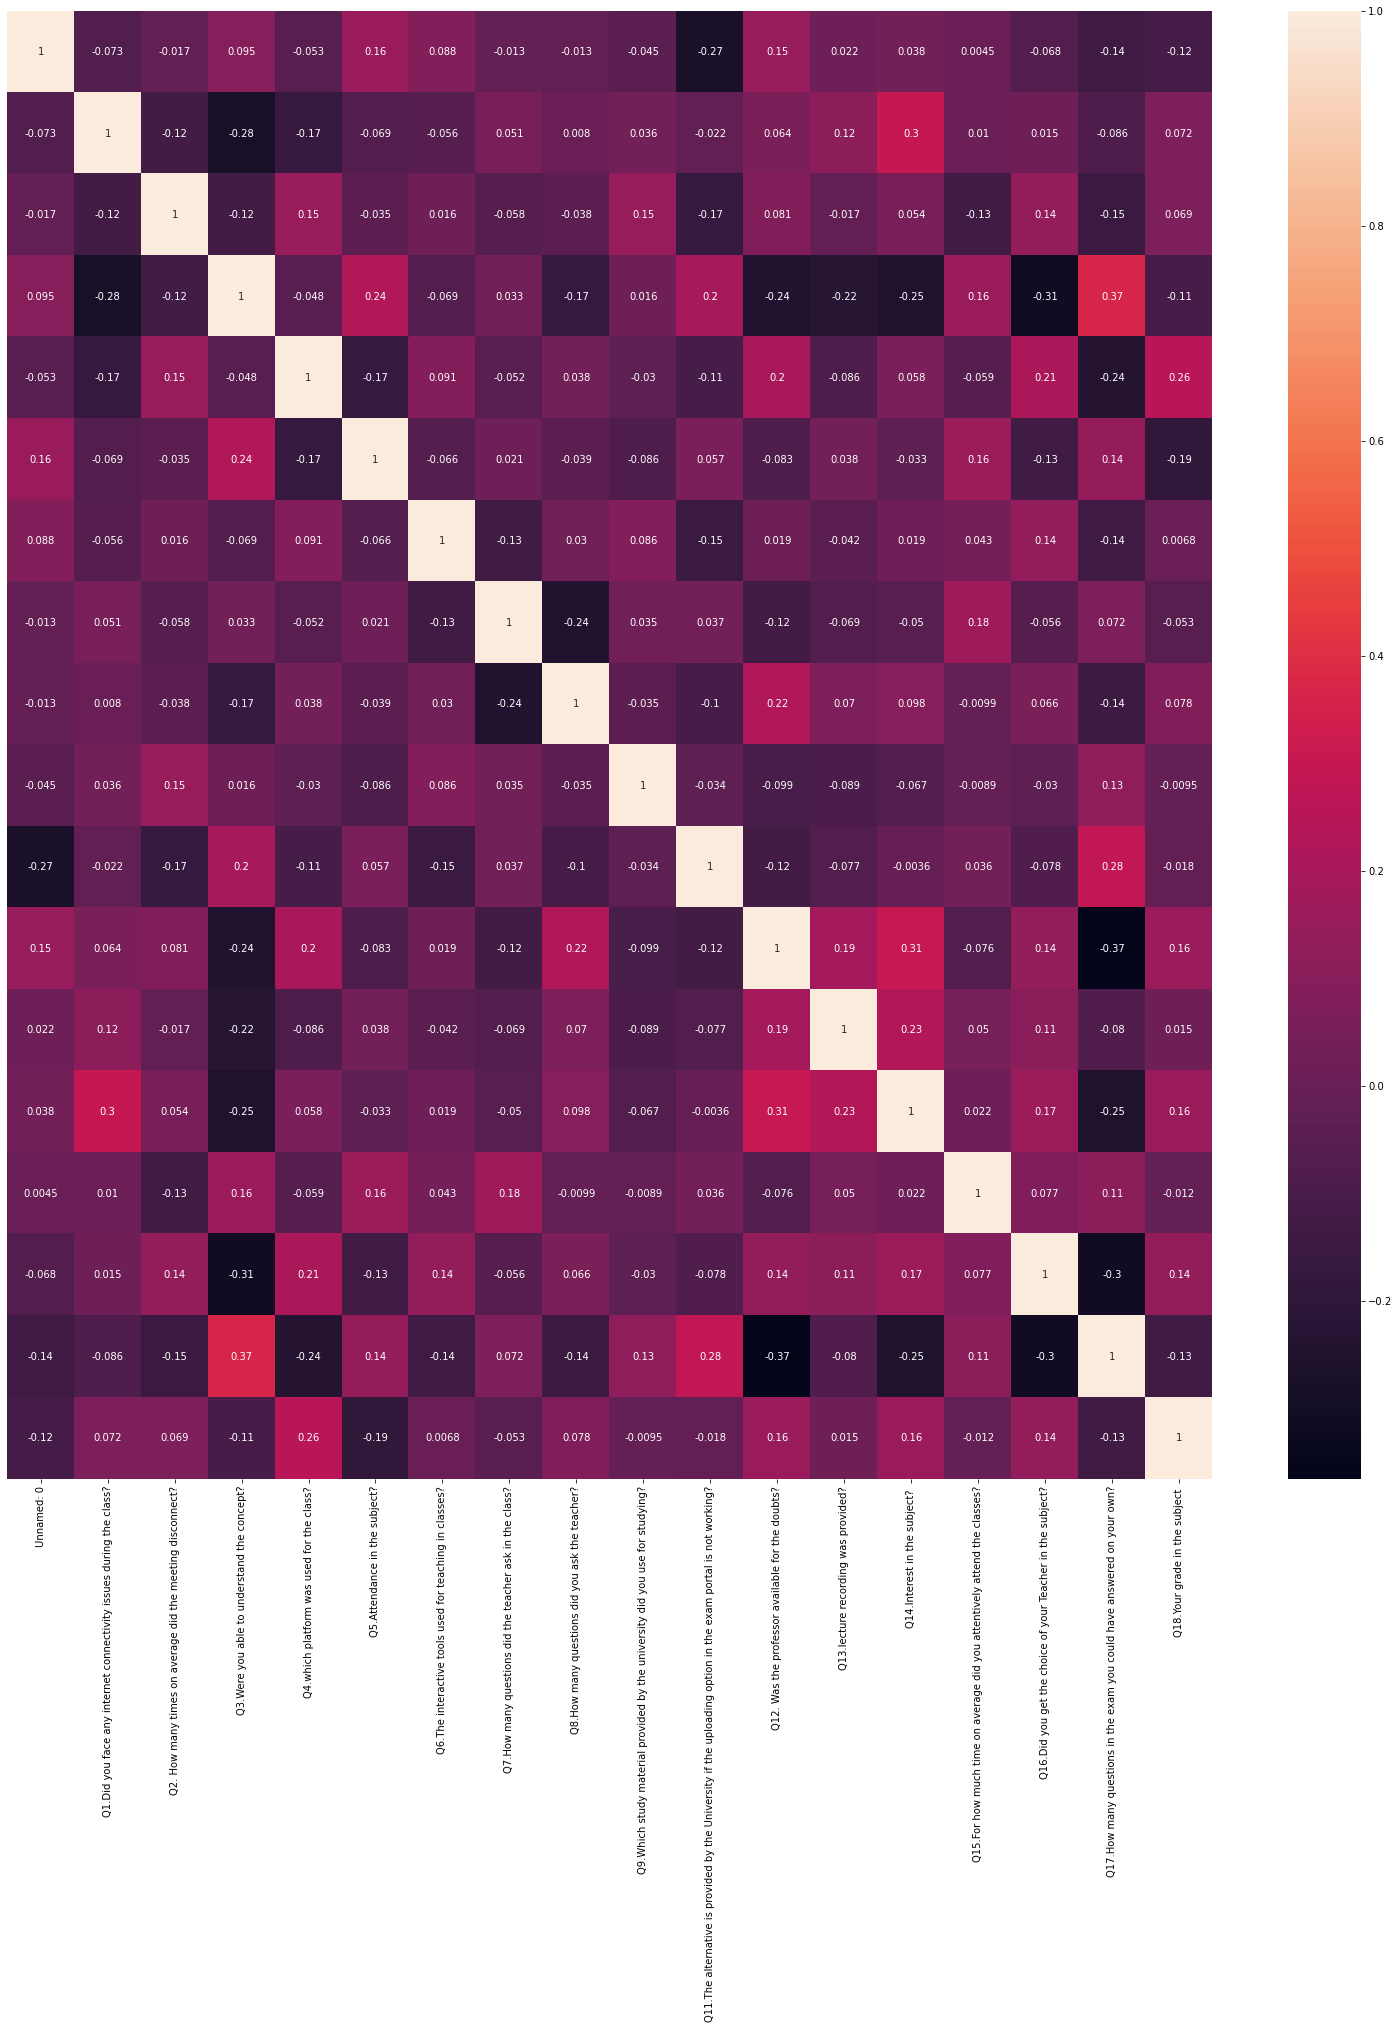

In [85]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 27,27
sns.heatmap(df.corr(),annot=True,yticklabels=False)

In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print(acc_xgb)
print(f1_score(yhat,y_test,average="macro"))

97.88135593220339
0.9789384059369012


In [87]:
X = df.iloc[:,3:20]
y = df['Q18.Your grade in the subject ']

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                                                Specs      Score
3           Q4.which platform was used for the class?  73.391579
4                       Q5.Attendance in the subject?  53.991130
8   Q9.Which study material provided by the univer...  33.323800
11   Q12. Was the professor available for the doubts?  16.440499
15  Q16.Did you get the choice of your Teacher in ...   9.473736
1   Q2. How many times on average did the meeting ...   8.393266
13                      Q14.Interest in the subject?    7.710882
16  Q17.How many questions in the exam you could h...   7.558850
14  Q15.For how much time on average did you atten...   7.153797
2         Q3.Were you able to understand the concept?   6.518855


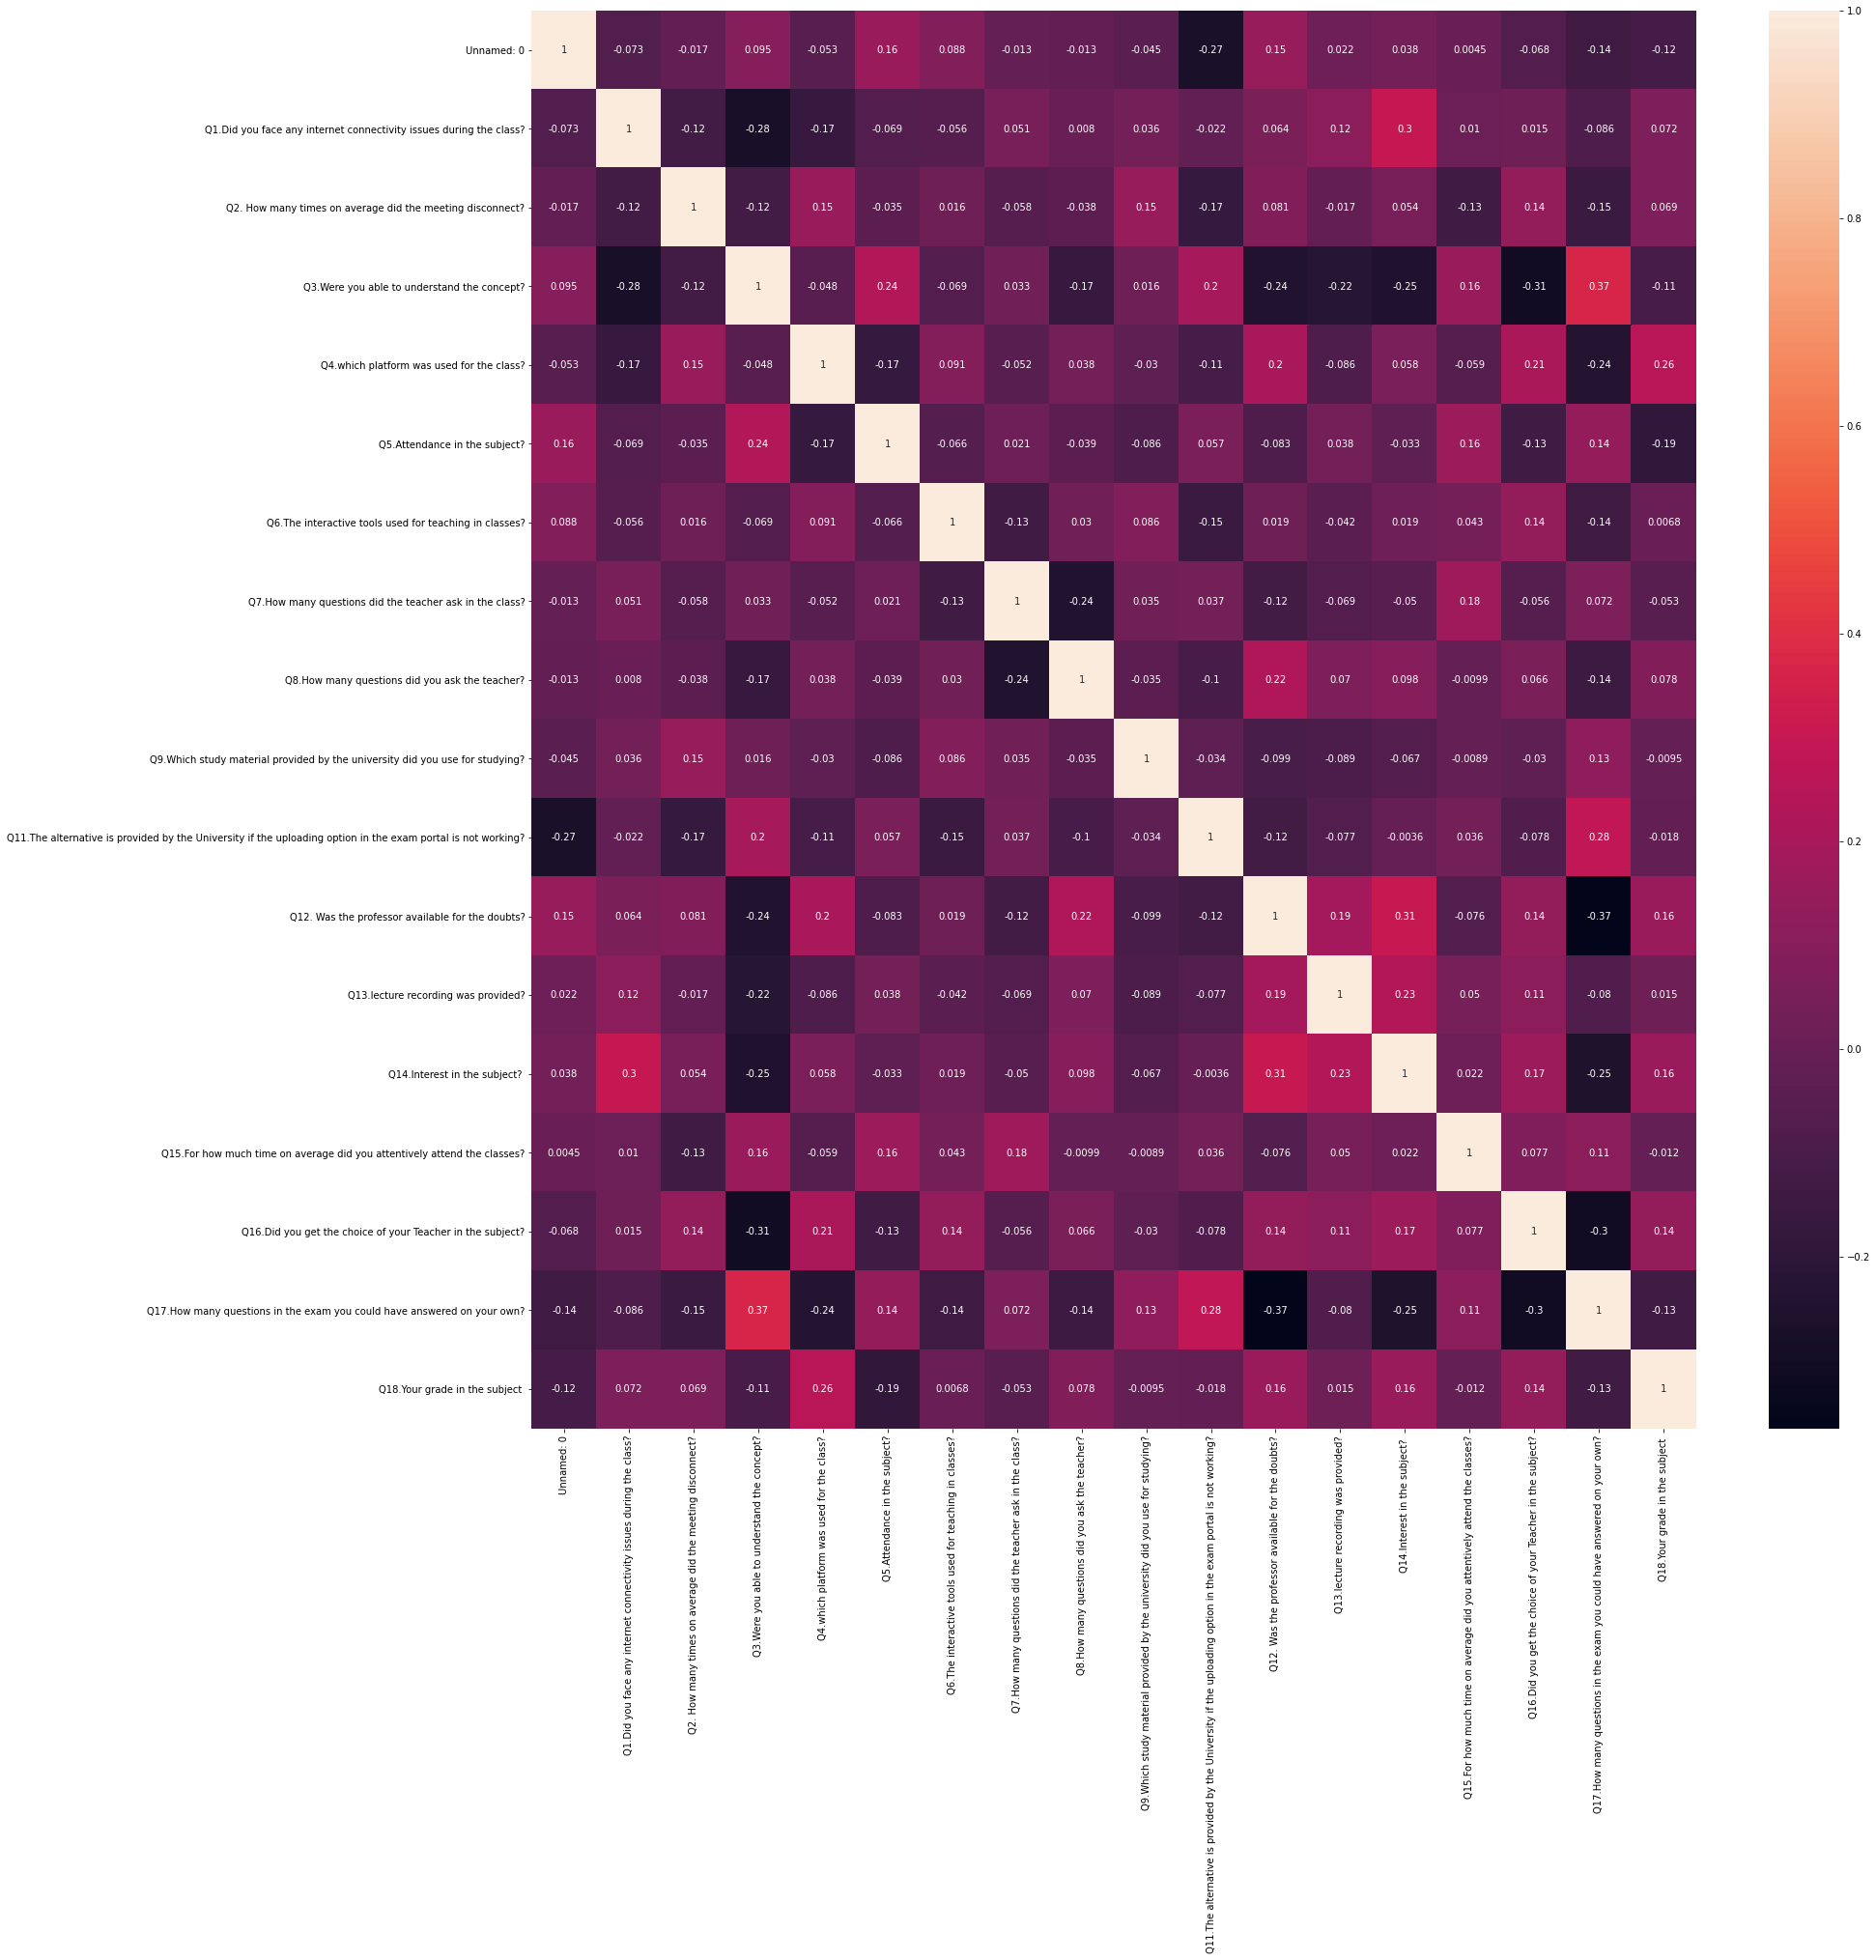

In [89]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 27,27
sns.heatmap(df.corr(),annot=True,yticklabels=True)

In [90]:
from sklearn.ensemble import VotingClassifier
model1 = XGBClassifier(n_estimators=100)
model2 = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01,max_depth=3, random_state=0)
model3= KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs=-1, n_neighbors=10, weights='distance')
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(f1_score(yhat,y_test,average="macro"))

0.9661016949152542
0.9789384059369012
